In [1]:
%load_ext autoreload

In [297]:
%autoreload
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pears import pears

from pyinla.marginals import *
from pyinla.model import *

In [288]:
d = pd.read_csv("./data/hospital.csv", delim_whitespace=True)

In [289]:
priors = dict(prior_prec=dict(prec=dict(prior="pc.prec", param=np.array([1.0, 0.01]))))

formula = 'r ~ f(hospital, model="iid", hyper=prior_prec)'
data = pd_to_dict(d) | priors

In [298]:
result = inla(
    formula,
    data,
    family="binomial",
    n_trials=data["n"],
    control_compute=dict(dic=True, config=True, return_marginals_predictor=True),
    control_predictor=dict(compute=True),
).improve_hyperpar()

In [299]:
posterior = result.sample_posterior(500)

In [291]:
print(result)

Time used:
     = 1.05,  = 0.303,  = 0.0472,  = 1.4 
Fixed effects:
              mean    sd 0.025quant 0.5quant 0.975quant   mode kld
(Intercept) -2.547 0.141     -2.843   -2.543     -2.279 -2.535   0

Random effects:
  Name	  Model
    hospital IID model

Model hyperparameters:
                        mean    sd 0.025quant 0.5quant 0.975quant mode
Precision for hospital 11.52 12.71       2.36     8.27      39.19 5.34

Deviance Information Criterion (DIC) ...............: 74.45
Deviance Information Criterion (DIC, saturated) ....: 24.69
Effective number of parameters .....................: 8.10

Marginal log-Likelihood:  -41.17 
 is computed 
Posterior summaries for the linear predictor and the fitted values are computed
(Posterior marginals needs also 'control.compute=list(return.marginals.predictor=TRUE)')




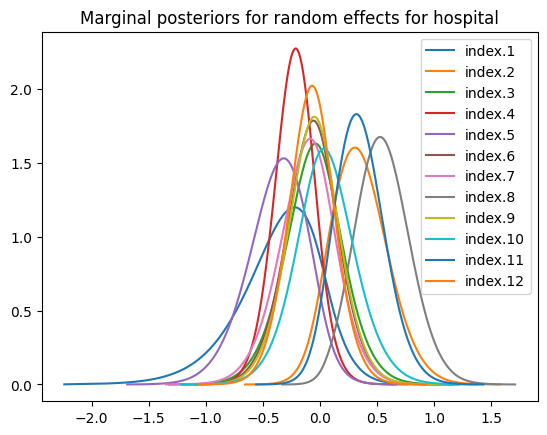

In [292]:
re_hospital = result.get_marginal_type("random").get_marginal("hospital")
for re, n in zip(re_hospital, re_hospital.names):
    re.spline().plot(label=n)
plt.title("Marginal posteriors for random effects for hospital")
plt.legend()

# posterior samples from the joint marginals for the random effects

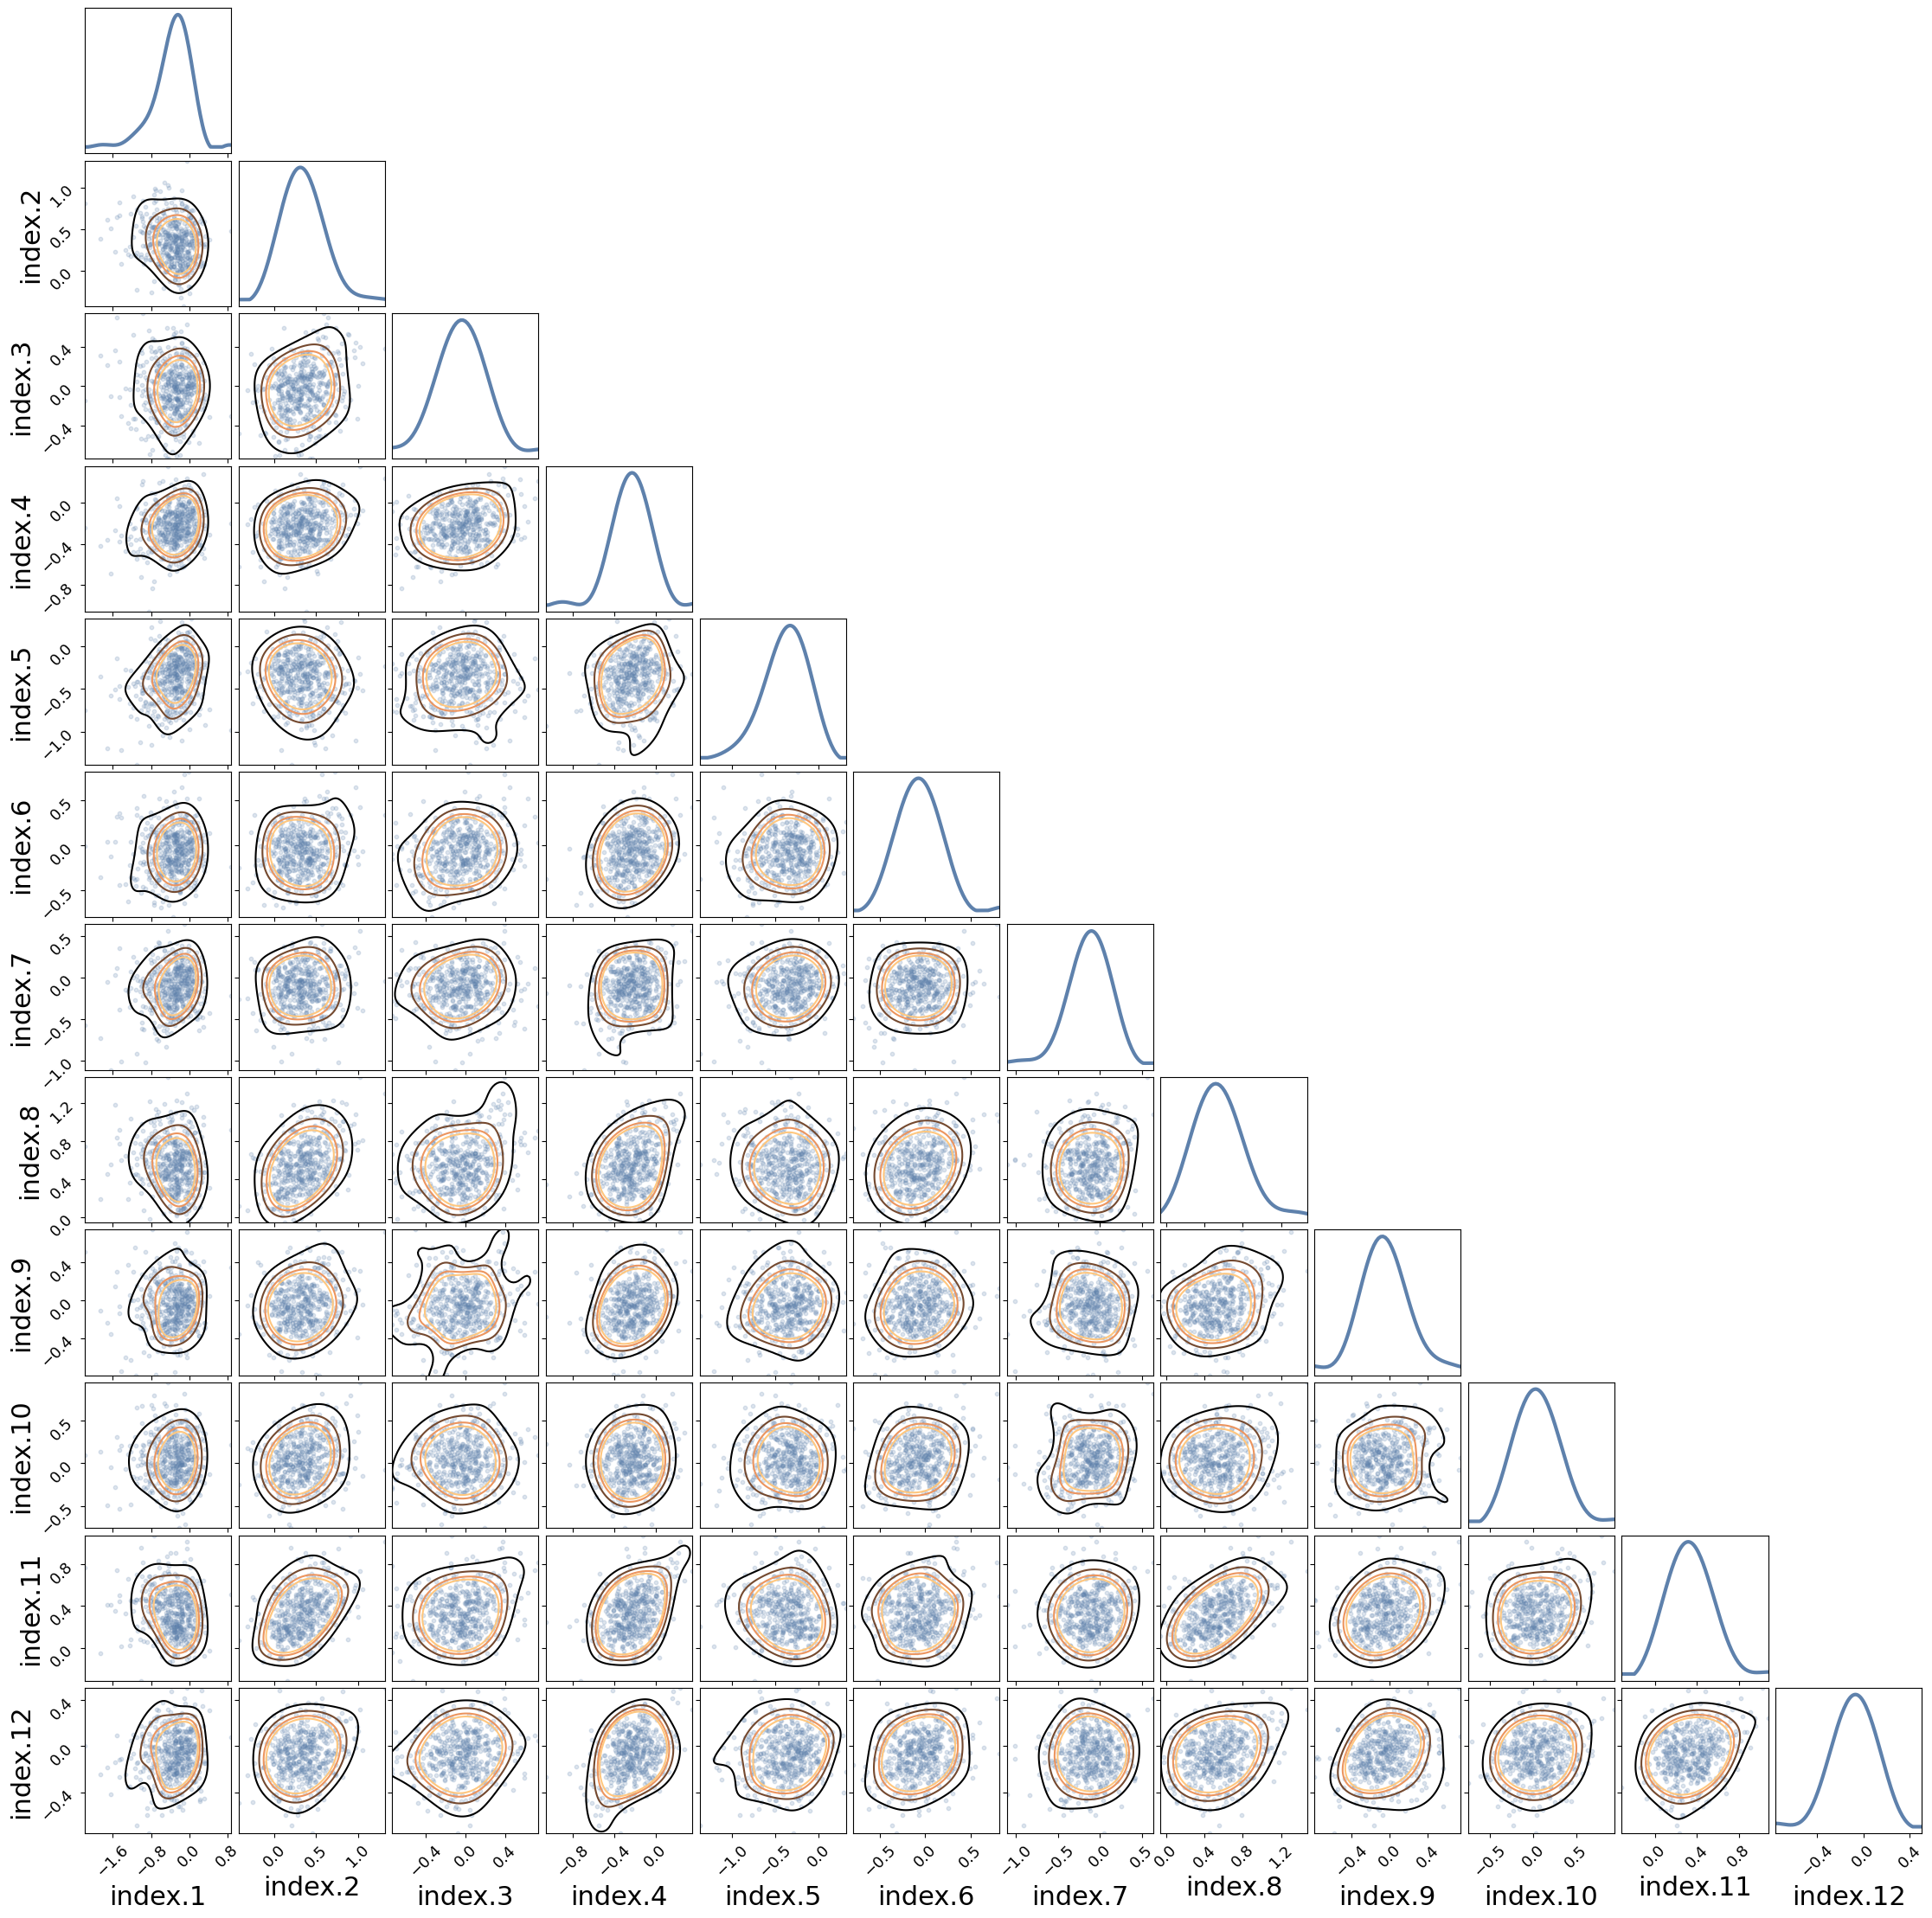

In [293]:
pears(posterior["latent"][:, 12:24, 0].T, labels=re_hospital.names);

Text(0.5, 1.0, 'Marginal posterior for standard deviation for hospital')

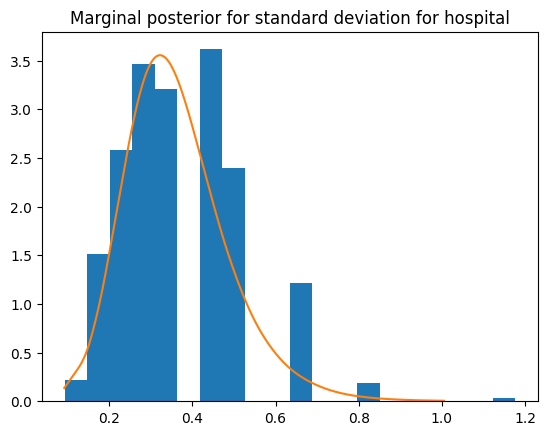

In [118]:
plt.hist(posterior["hyperpar"] ** (-1 / 2), density=1, bins=20)
result.get_marginal_type("hyperpar").get_marginal("Precision for hospital").transform(
    "x**(-1/2)"
).plot()
plt.title("Marginal posterior for standard deviation for hospital")

Text(0.5, 1.0, 'Marginal posterior for intercept')

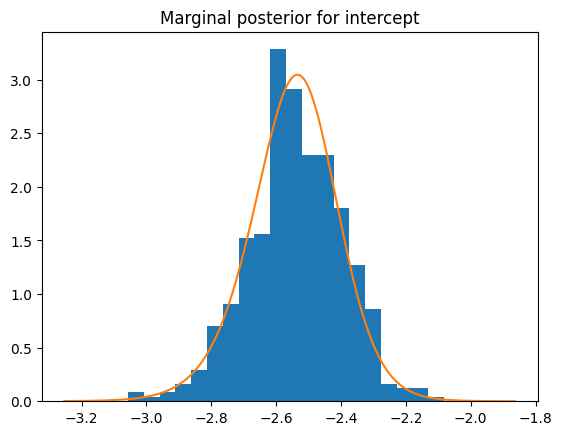

In [146]:
plt.hist(posterior["latent"][:, -1], bins=20, density=1)
result.get_marginal_type("fixed").get_marginal(0).spline().plot()
plt.title("Marginal posterior for intercept")

Text(0.5, 1.0, 'Marginal posterior for intercept')

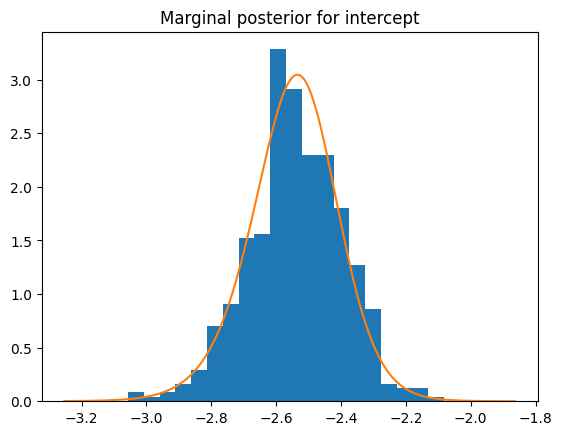

In [146]:
plt.hist(posterior["latent"][:, -1], bins=20, density=1)
result.get_marginal_type("fixed").get_marginal(0).spline().plot()
plt.title("Marginal posterior for intercept")